Polished code with all our imports in one spot



In [ ]:
import requests
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = "https://data.ca.gov/api/3/action/datastore_search"
params = {
    "resource_id": "c8c8bee2-96a6-410f-b32a-2039de52ea12",
    "limit": 5
}

response = requests.get(url, params=params)
data = response.json()

records = data['result']['records']

df = pd.DataFrame(records)

df.head()

,_id,County,AMI,ALI_1,ALI_2,ALI_3,ALI_4,ALI_5,ALI_6,ALI_7,...,LI_7,LI_8,MOD_1,MOD_2,MOD_3,MOD_4,MOD_5,MOD_6,MOD_7,MOD_8
0,1,Alameda,147900,15550,17750,20000,22200,24000,25750,27550,...,139100,148050,124250,142000,159750,177500,191700,205900,220100,234300
1,2,Alpine,114600,12050,13750,15500,17200,18600,19950,21350,...,95400,101550,96250,110000,123750,137500,148500,159500,170500,181500
2,3,Amador,101200,10650,12150,13700,15200,16400,17650,18850,...,91000,96850,85000,97150,109300,121450,131150,140900,150600,160300
3,4,Butte,91600,9650,11000,12400,13750,14850,15950,17050,...,81800,87100,76950,87900,98900,109900,118700,127500,136300,145050
4,5,Calaveras,96200,10100,11550,13000,14450,15600,16750,17900,...,94550,100650,80800,92350,103900,115450,124700,133900,143150,152400


In [ ]:
file_path = '/content/drive/MyDrive/STAT_596/California auto insurance.xlsx'
CountyInsuranceRates = pd.read_excel(file_path)

print(CountyInsuranceRates.head())

         County  Minimum Liability:  Monthly  Annual  Full Coverage:  \
0           NaN                 NaN      NaN     NaN             NaN   
1      Alhambra              1312.0    109.0  1308.0          5319.0   
2       Anaheim              1123.0     94.0  1128.0          4603.0   
3  Arden-Arcade              1174.0     98.0  1176.0          4516.0   
4   Bakersfield               982.0     82.0   984.0          4314.0   

   MonthlyFC:  FCAnnual  
0         NaN       NaN  
1       443.0    5316.0  
2       384.0    4608.0  
3       376.0    4512.0  
4       359.0    4308.0  


In [ ]:
file_path = '/content/drive/MyDrive/STAT_596/IncomeData.xlsx'

IncomeData = pd.read_excel(file_path)

print(IncomeData.head())

            County    FIPS  MedianIncome  Rank within US (of 3141 counties)
0   Trinity County  6105.0       53498.0                             2457.0
1  Siskiyou County  6093.0       55499.0                             2309.0
2  Imperial County  6025.0       56393.0                             2246.0
3     Modoc County  6049.0       56648.0                             2221.0
4      Lake County  6033.0       58738.0                             2055.0


In [ ]:
print(IncomeData.head())
print(CountyInsuranceRates.head())

            County    FIPS  MedianIncome  Rank within US (of 3141 counties)
0   Trinity County  6105.0       53498.0                             2457.0
1  Siskiyou County  6093.0       55499.0                             2309.0
2  Imperial County  6025.0       56393.0                             2246.0
3     Modoc County  6049.0       56648.0                             2221.0
4      Lake County  6033.0       58738.0                             2055.0
         County  Minimum Liability:  Monthly  Annual  Full Coverage:  \
0           NaN                 NaN      NaN     NaN             NaN   
1      Alhambra              1312.0    109.0  1308.0          5319.0   
2       Anaheim              1123.0     94.0  1128.0          4603.0   
3  Arden-Arcade              1174.0     98.0  1176.0          4516.0   
4   Bakersfield               982.0     82.0   984.0          4314.0   

   MonthlyFC:  FCAnnual  
0         NaN       NaN  
1       443.0    5316.0  
2       384.0    4608.0  
3      

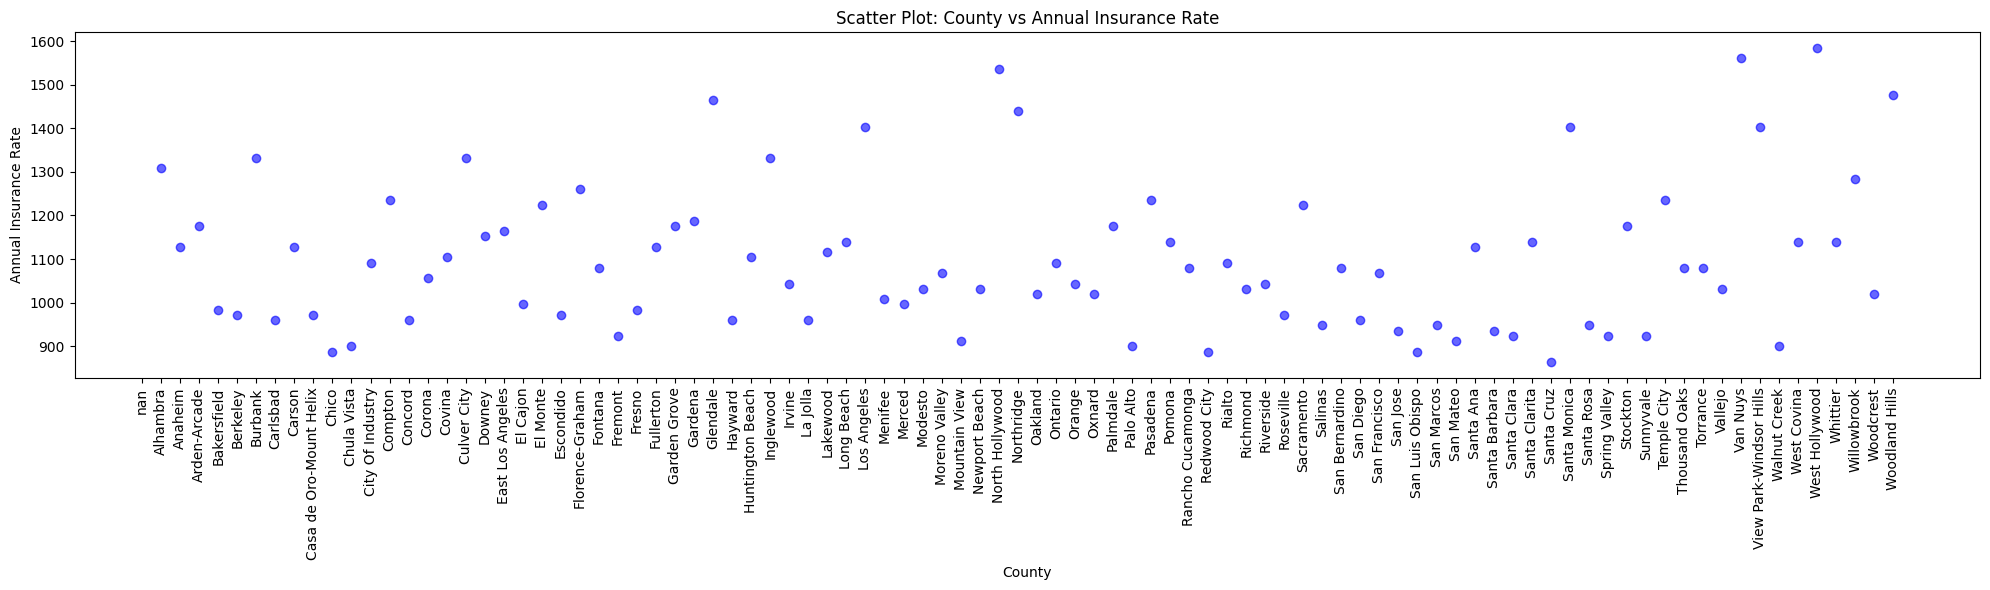

In [ ]:
CountyInsuranceRates['County'] = CountyInsuranceRates['County'].astype(str)

plt.figure(figsize=(20, 6))
plt.scatter(CountyInsuranceRates['County'], CountyInsuranceRates['Annual'], color='blue', alpha=0.6)
plt.xlabel('County')
plt.ylabel('Annual Insurance Rate')
plt.title('Scatter Plot: County vs Annual Insurance Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

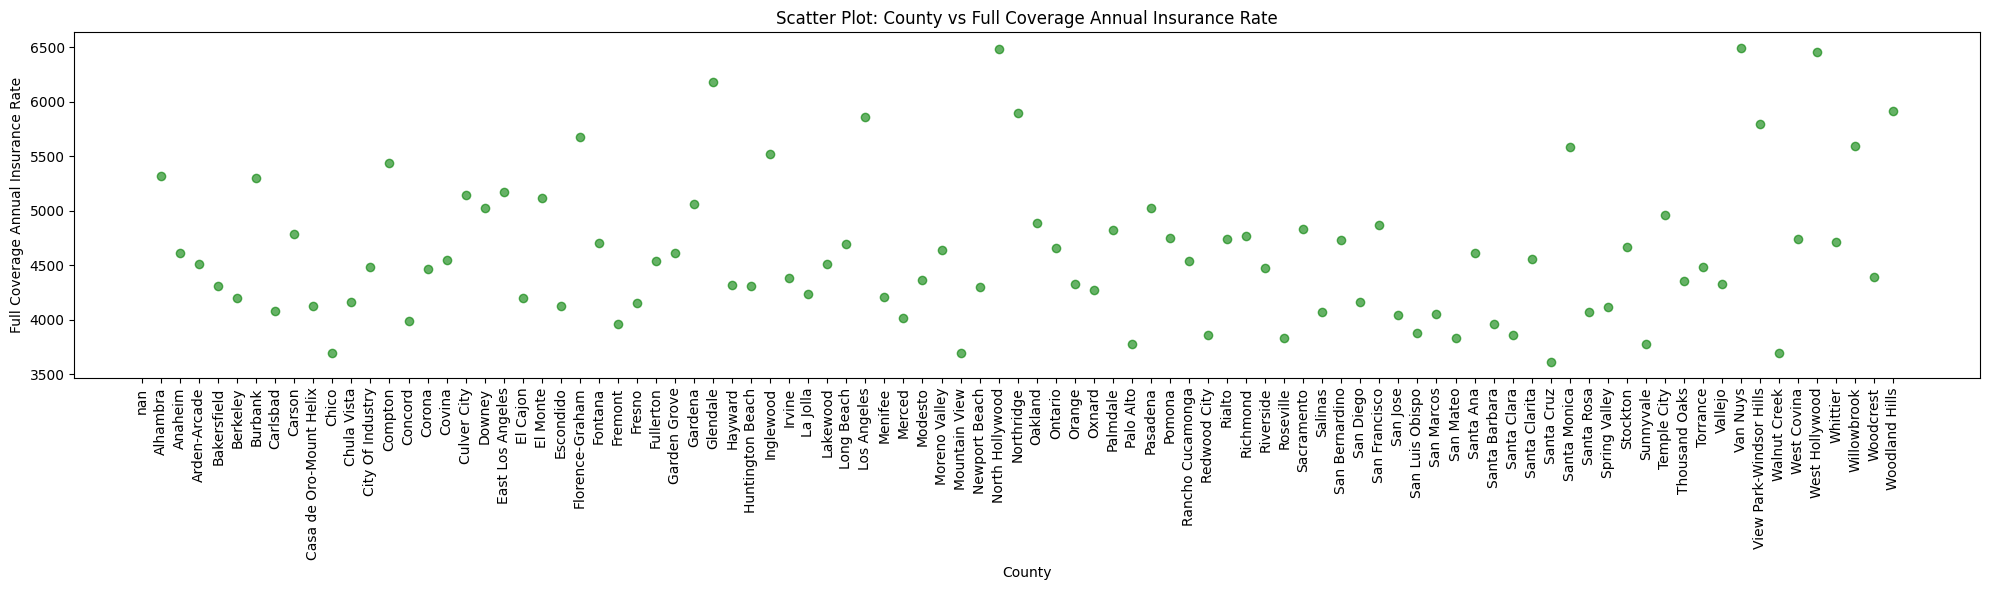

In [ ]:
CountyInsuranceRates['County'] = CountyInsuranceRates['County'].astype(str)

plt.figure(figsize=(20, 6))
plt.scatter(CountyInsuranceRates['County'], CountyInsuranceRates['FCAnnual'], color='green', alpha=0.6)
plt.xlabel('County')
plt.ylabel('Full Coverage Annual Insurance Rate')
plt.title('Scatter Plot: County vs Full Coverage Annual Insurance Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

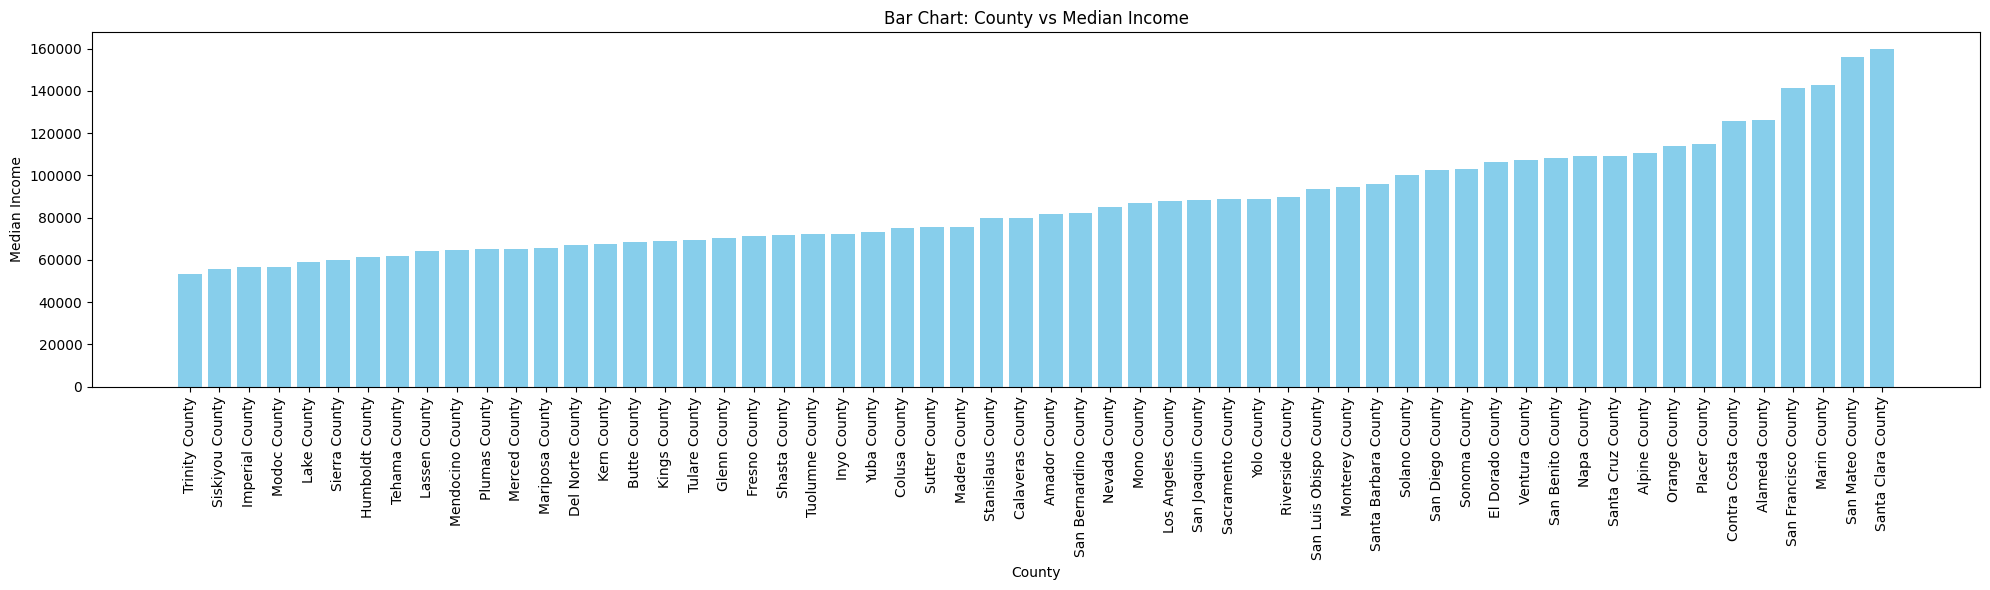

In [ ]:
IncomeData['County'] = IncomeData['County'].astype(str)
IncomeData['MedianIncome'] = pd.to_numeric(IncomeData['MedianIncome'], errors='coerce')

IncomeData_clean = IncomeData.dropna(subset=['County', 'MedianIncome'])

plt.figure(figsize=(20, 6))
plt.bar(IncomeData_clean['County'], IncomeData_clean['MedianIncome'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Median Income')
plt.title('Bar Chart: County vs Median Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
IncomeData['County'] = IncomeData['County'].str.replace(' County', '', regex=False).str.strip().str.lower()
CountyInsuranceRates['County'] = CountyInsuranceRates['County'].str.strip().str.lower()

merged_data = pd.merge(IncomeData, CountyInsuranceRates, on='County')


pd.set_option('display.max_rows', None)
merged_data = merged_data.dropna()

print(merged_data)

             County    FIPS  MedianIncome  Rank within US (of 3141 counties)  \
0            merced  6047.0       65044.0                             1420.0   
1            fresno  6019.0       71434.0                              945.0   
2    san bernardino  6071.0       82184.0                              440.0   
3       los angeles  6037.0       87760.0                              294.0   
4        sacramento  6067.0       88724.0                              273.0   
5         riverside  6065.0       89672.0                              258.0   
6   san luis obispo  6079.0       93398.0                              219.0   
7     santa barbara  6083.0       95977.0                              184.0   
8         san diego  6073.0      102285.0                              131.0   
9        santa cruz  6087.0      109266.0                               84.0   
10           orange  6059.0      113702.0                               64.0   
11    san francisco  6075.0      141446.

Intercept: 4815.101850968063
Slope: -0.004692836379232312


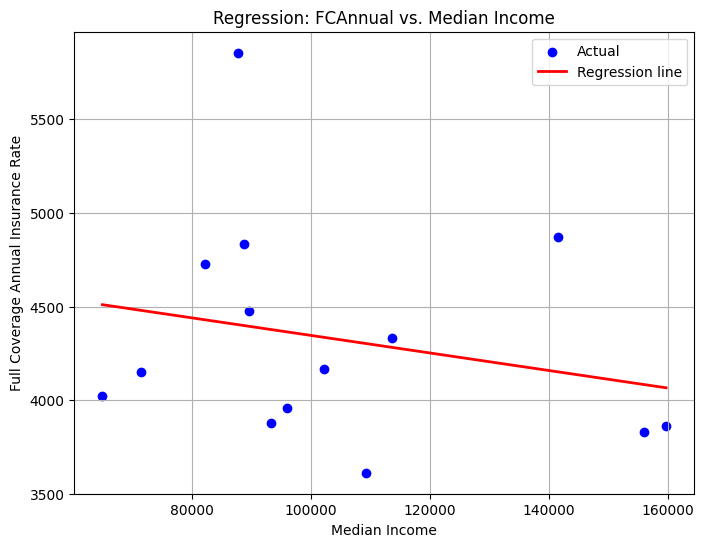

                            OLS Regression Results                            
Dep. Variable:               FCAnnual   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.6934
Date:                Thu, 08 May 2025   Prob (F-statistic):              0.421
Time:                        21:42:53   Log-Likelihood:                -108.30
No. Observations:                  14   AIC:                             220.6
Df Residuals:                      12   BIC:                             221.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4815.1019    607.744      7.923   

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
X = merged_data[['MedianIncome']]
y = merged_data['FCAnnual']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Median Income')
plt.ylabel('Full Coverage Annual Insurance Rate')
plt.title('Regression: FCAnnual vs. Median Income')
plt.legend()
plt.grid(True)
plt.show()

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

print(model_sm.summary())

Intercept: 4815.101850968063
Slope: -0.004692836379232312


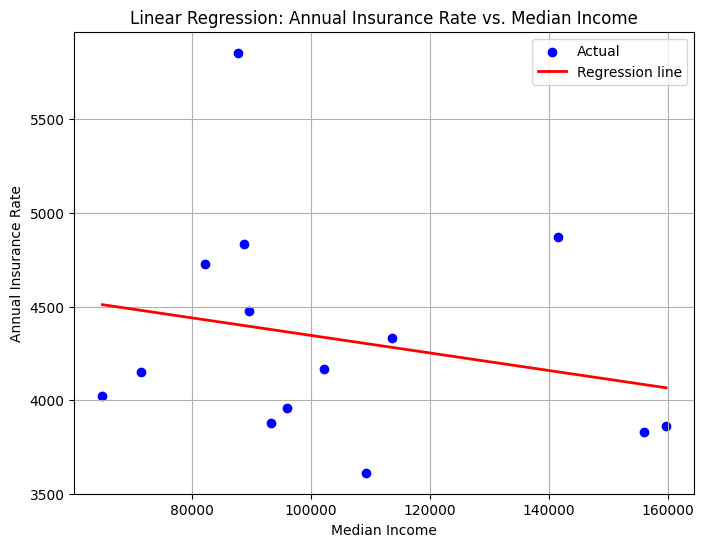

                            OLS Regression Results                            
Dep. Variable:               FCAnnual   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.6934
Date:                Thu, 08 May 2025   Prob (F-statistic):              0.421
Time:                        21:43:16   Log-Likelihood:                -108.30
No. Observations:                  14   AIC:                             220.6
Df Residuals:                      12   BIC:                             221.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4815.1019    607.744      7.923   

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Median Income')
plt.ylabel('Annual Insurance Rate')
plt.title('Linear Regression: Annual Insurance Rate vs. Median Income')
plt.legend()
plt.grid(True)
plt.show()

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

print(model_sm.summary())

In [ ]:
file_path = '/content/drive/MyDrive/STAT_596/AutoTheft.xlsx'

AutoTheft = pd.read_excel(file_path)

print(AutoTheft.head())

           County   2022   2021  % Change
0          Merced   1321   1183      11.7
1          Fresno   5711   5326       7.2
2  San Bernardino  10449  10567      -1.1
3     Los Angeles  60870  60533       0.6
4      Sacramento   8830   7238      22.0


In [ ]:
AutoTheft['County'] = AutoTheft['County'].str.strip().str.lower()
CountyInsuranceRates['County'] = CountyInsuranceRates['County'].str.strip().str.lower()

merge_theft = pd.merge(CountyInsuranceRates, AutoTheft, on='County')

print(merge_theft)

             County  Minimum Liability:  Monthly  Annual  Full Coverage:  \
0            fresno               985.0     82.0   984.0          4157.0   
1       los angeles              1407.0    117.0  1404.0          5851.0   
2            merced               998.0     83.0   996.0          4024.0   
3            orange              1041.0     87.0  1044.0          4335.0   
4         riverside              1038.0     87.0  1044.0          4472.0   
5        sacramento              1225.0    102.0  1224.0          4839.0   
6    san bernardino              1079.0     90.0  1080.0          4727.0   
7         san diego               965.0     80.0   960.0          4167.0   
8     san francisco              1064.0     89.0  1068.0          4878.0   
9   san luis obispo               887.0     74.0   888.0          3876.0   
10        san mateo               914.0     76.0   912.0          3826.0   
11    santa barbara               941.0     78.0   936.0          3957.0   
12      sant

Intercept: 4028.942376973022
Slope: 0.03282238984495162


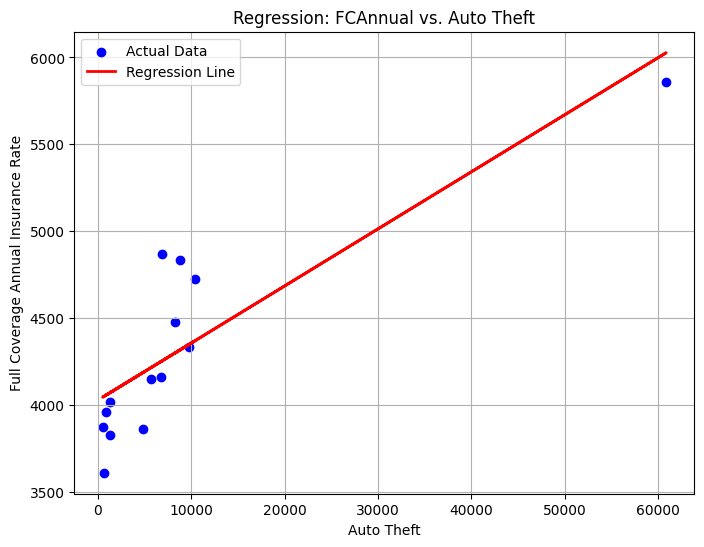

                            OLS Regression Results                            
Dep. Variable:               FCAnnual   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     31.66
Date:                Thu, 08 May 2025   Prob (F-statistic):           0.000111
Time:                        21:43:46   Log-Likelihood:                -99.652
No. Observations:                  14   AIC:                             203.3
Df Residuals:                      12   BIC:                             204.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4028.9424    101.160     39.828      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
X = merge_theft[['2022']]
y = merge_theft['FCAnnual']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Auto Theft')
plt.ylabel('Full Coverage Annual Insurance Rate')
plt.title('Regression: FCAnnual vs. Auto Theft')
plt.legend()
plt.grid(True)
plt.show()

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

print(model_sm.summary())

Intercept: 3752.709329784217
Slope: 0.08964651691497513


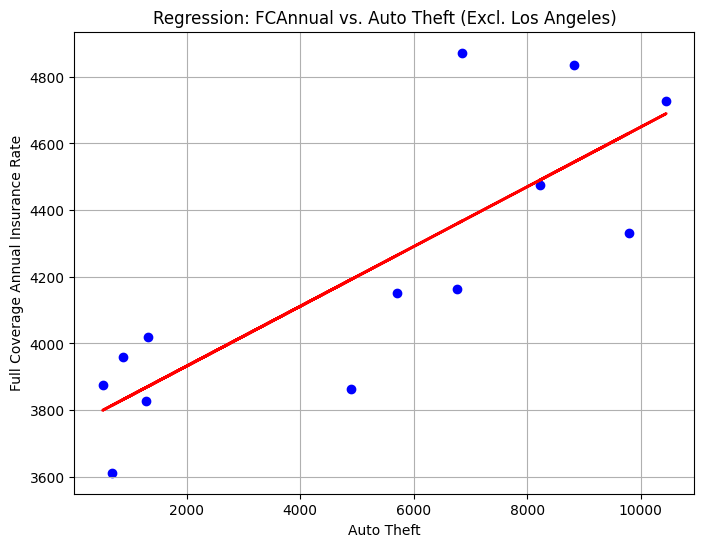

                            OLS Regression Results                            
Dep. Variable:               FCAnnual   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     21.95
Date:                Thu, 08 May 2025   Prob (F-statistic):           0.000666
Time:                        21:43:56   Log-Likelihood:                -89.023
No. Observations:                  13   AIC:                             182.0
Df Residuals:                      11   BIC:                             183.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3752.7093    119.230     31.475      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
merge_theft_LA = merge_theft.copy()
merge_theft_LA = merge_theft_LA[merge_theft_LA['County'].str.lower() != 'los angeles']
merge_theft_LA = merge_theft_LA.dropna(subset=['2022', 'FCAnnual'])

X = merge_theft_LA[['2022']]
y = merge_theft_LA['FCAnnual']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Auto Theft')
plt.ylabel('Full Coverage Annual Insurance Rate')
plt.title('Regression: FCAnnual vs. Auto Theft (Excl. Los Angeles)')
plt.grid(True)
plt.show()

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

print(model_sm.summary())


In [ ]:
file_path = '/content/drive/MyDrive/STAT_596/TempData.csv'

TempData = pd.read_csv(file_path)


In [ ]:
selected_counties = [
    "Fresno", "Los Angeles", "Merced", "Orange", "Riverside", "Sacramento",
    "San Bernardino", "San Diego", "San Francisco", "San Luis Obispo",
    "San Mateo", "Santa Barbara", "Santa Clara", "Santa Cruz"
]

filtered_temp_data = TempData[TempData["County"].isin(selected_counties)]

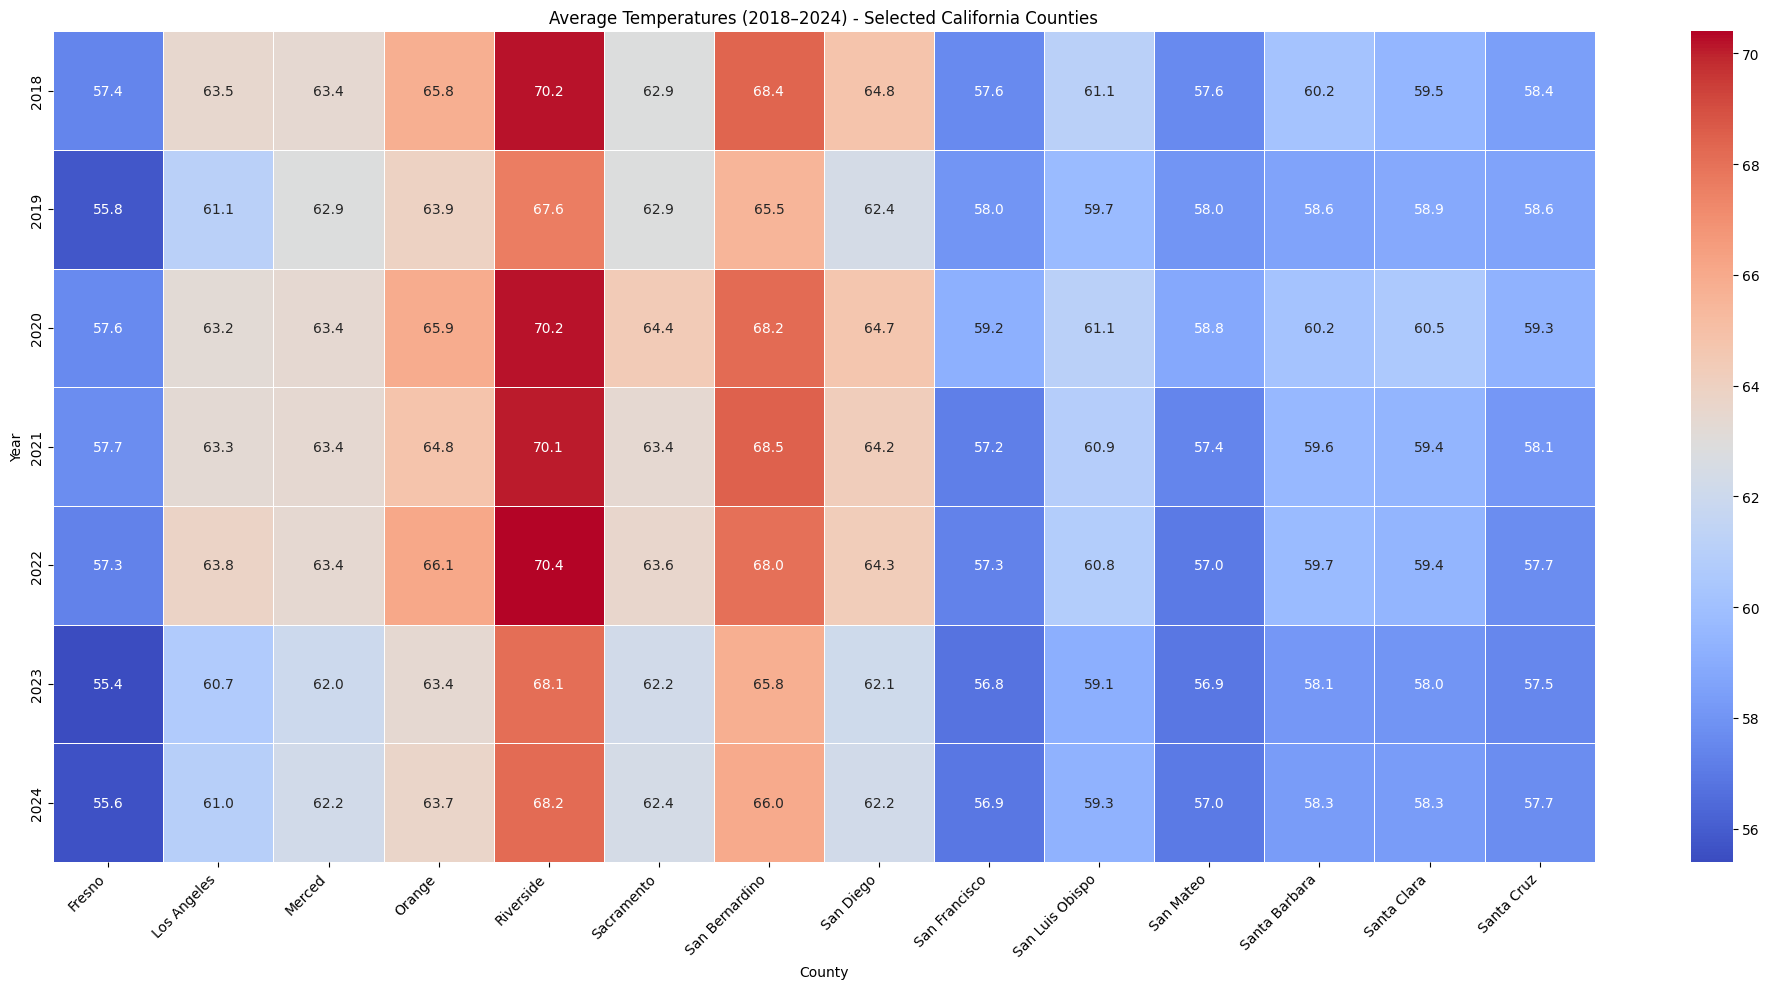

In [ ]:
heatmap_data = filtered_temp_data.set_index("County").drop(columns=["State"]).T

plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)

plt.title("Average Temperatures (2018–2024) - Selected California Counties")
plt.xlabel("County")
plt.ylabel("Year")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
results = []

for county in heatmap_data.columns:
    y = heatmap_data[county].dropna()
    X = y.index.astype(int)  # Year as numeric
    X = sm.add_constant(X)

    model = sm.OLS(y.values, X).fit()
    p_value = model.pvalues[1]  # p-value for slope (trend)

    results.append({
        'County': county,
        'Slope': model.params[1],
        'p-value': p_value,
        'Significant': p_value < 0.05
    })

trend_summary = pd.DataFrame(results).sort_values('p-value')
print(trend_summary)

             County     Slope   p-value  Significant
13       Santa Cruz -0.210714  0.068945        False
2            Merced -0.192857  0.095306        False
10        San Mateo -0.207143  0.111504        False
11    Santa Barbara -0.257143  0.135407        False
9   San Luis Obispo -0.246429  0.152460        False
12      Santa Clara -0.232143  0.153485        False
8     San Francisco -0.228571  0.156348        False
7         San Diego -0.314286  0.200001        False
0            Fresno -0.232143  0.267963        False
3            Orange -0.253571  0.277972        False
1       Los Angeles -0.275000  0.328489        False
6    San Bernardino -0.242857  0.391862        False
5        Sacramento -0.132143  0.402142        False
4         Riverside -0.171429  0.509748        False


In [ ]:
statewide_avg = TempData.drop(columns=["County", "State"]).mean().to_frame(name="Average Temperature")
print(statewide_avg)

      Average Temperature
2018            58.763793
2019            57.593103
2020            59.518966
2021            59.056897
2022            58.805172
2023            57.229310
2024            57.465517


In [ ]:
file_path = '/content/drive/MyDrive/STAT_596/Fires.csv'
Fires = pd.read_csv(file_path)

In [ ]:
Fires_2019 = Fires[Fires['incident_dateonly_created'].astype(str).str.startswith('2019')]
Fires_2019 = Fires_2019.dropna(subset=['incident_latitude', 'incident_longitude'])

import folium

m = folium.Map(location=[37.0, -119.5], zoom_start=6, tiles='OpenStreetMap')

for _, row in Fires_2019.iterrows():
    folium.CircleMarker(
        location=[row['incident_latitude'], row['incident_longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=row.get('incident_name', 'Fire')
    ).add_to(m)

m.get_root().html.add_child(folium.Element("<h4 style='text-align:center;'>2019 Fire Incident Data</h4>"))
m


In [ ]:
file_path = '/content/drive/MyDrive/STAT_596/FirePolicies2019.csv'
FirePolicies2019 = pd.read_csv(file_path)

In [ ]:
file_path = '/content/drive/MyDrive/STAT_596/Fires.csv'
Fires = pd.read_csv(file_path)

Fires = Fires.rename(columns={'incident_county': 'County'})

In [ ]:
Fires_2019 = Fires[Fires['incident_dateonly_created'].astype(str).str.startswith('2019')]

merged = pd.merge(Fires_2019, FirePolicies2019, on='County')

In [ ]:
selected_counties = [
    "Merced", "Fresno", "San Bernardino", "Los Angeles", "Sacramento", "Riverside",
    "San Luis Obispo", "Santa Barbara", "San Diego", "Santa Cruz", "Orange",
    "San Francisco", "San Mateo", "Santa Clara"
]

merged_selected = merged[merged['County'].isin(selected_counties)]

incident_counts = merged_selected['County'].value_counts().reset_index()
incident_counts.columns = ['County', 'Fire_Incidents_2019']

policy_counts = FirePolicies2019[FirePolicies2019['County'].isin(selected_counties)][
    ['County', 'Fire Homeowners', 'Fire Renters']
]

summary = pd.merge(incident_counts, policy_counts, on='County')
summary

,County,Fire_Incidents_2019,Fire Homeowners,Fire Renters
0,Riverside,32,451357,45646
1,San Diego,16,503066,26569
2,Santa Clara,11,297224,12079
3,San Luis Obispo,9,60681,7451
4,San Bernardino,7,388247,19916
5,Los Angeles,6,1316014,22305
6,Santa Barbara,4,66409,5236
7,Fresno,3,161689,4894
8,Sacramento,2,307452,7641
9,Merced,1,44286,1658


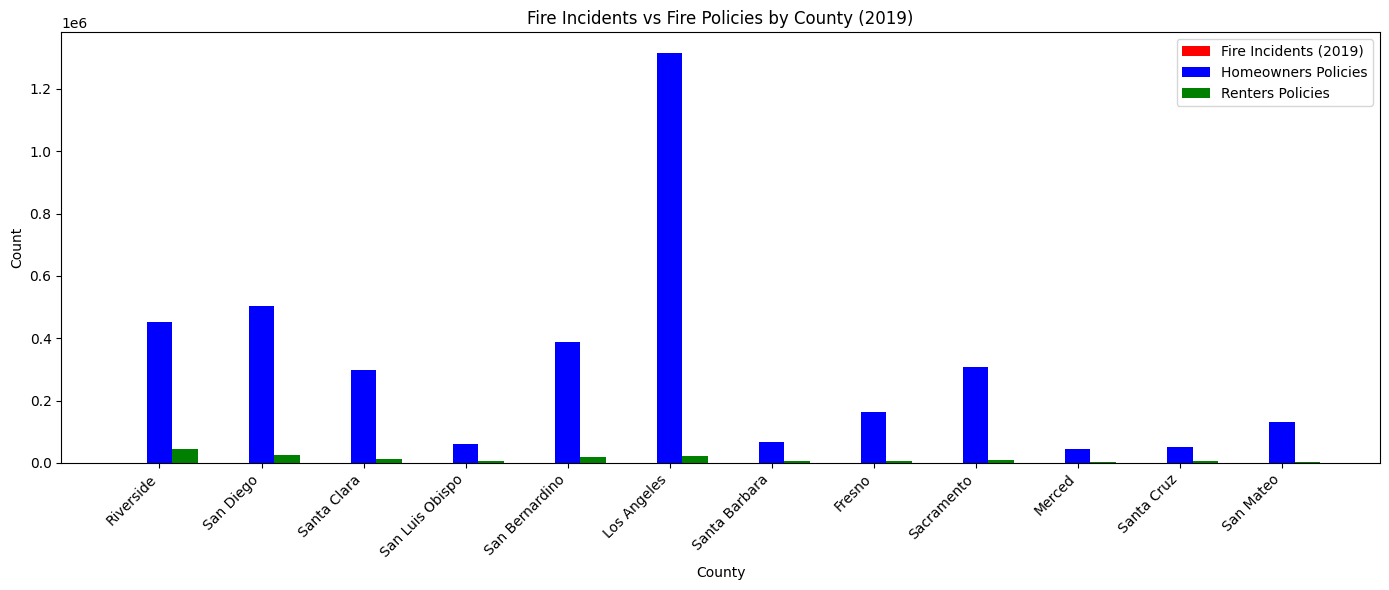

In [ ]:
summary_sorted = summary.sort_values(by='Fire_Incidents_2019', ascending=False)

bar_width = 0.25
x = range(len(summary_sorted))

plt.figure(figsize=(14, 6))

plt.bar(x, summary_sorted['Fire_Incidents_2019'], width=bar_width, label='Fire Incidents (2019)', color='red')
plt.bar([i + bar_width for i in x], summary_sorted['Fire Homeowners'], width=bar_width, label='Homeowners Policies', color='blue')
plt.bar([i + 2 * bar_width for i in x], summary_sorted['Fire Renters'], width=bar_width, label='Renters Policies', color='green')

plt.xlabel('County')
plt.ylabel('Count')
plt.title('Fire Incidents vs Fire Policies by County (2019)')
plt.xticks([i + bar_width for i in x], summary_sorted['County'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

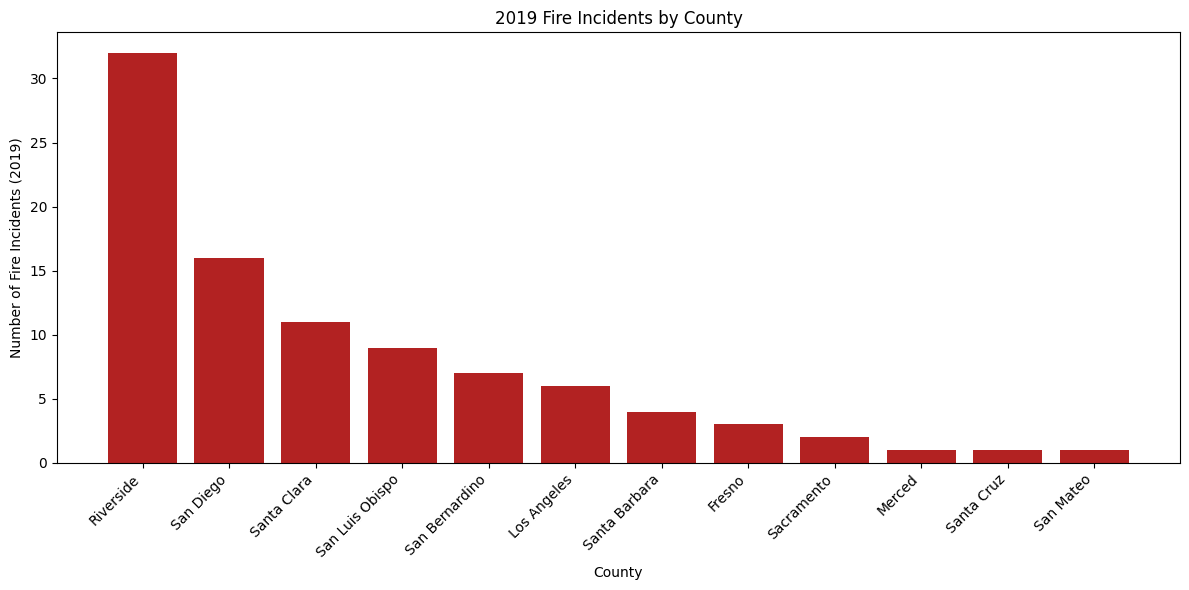

In [ ]:
incident_only = summary[['County', 'Fire_Incidents_2019']].sort_values(by='Fire_Incidents_2019', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(incident_only['County'], incident_only['Fire_Incidents_2019'], color='firebrick')
plt.xlabel('County')
plt.ylabel('Number of Fire Incidents (2019)')
plt.title('2019 Fire Incidents by County')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
file_path = '/content/drive/MyDrive/STAT_596/FirePolicies2021.xlsx'
FirePolicies2021 = pd.read_excel(file_path)

In [ ]:
Fires_2021 = Fires[Fires['incident_dateonly_created'].astype(str).str.startswith('2021')].copy()

Fires_2021.loc[:, 'County'] = Fires_2021['County'].str.title()
FirePolicies2021['County'] = FirePolicies2021['County'].str.title()

merged_2021 = pd.merge(Fires_2021, FirePolicies2021, on='County')

In [ ]:
Fires_2021 = Fires[Fires['incident_dateonly_created'].astype(str).str.startswith('2021')]
Fires_2021 = Fires_2021.dropna(subset=['incident_latitude', 'incident_longitude'])

import folium

m = folium.Map(location=[37.0, -119.5], zoom_start=6, tiles='OpenStreetMap')

for _, row in Fires_2021.iterrows():
    folium.CircleMarker(
        location=[row['incident_latitude'], row['incident_longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=row.get('incident_name', 'Fire')
    ).add_to(m)

m.get_root().html.add_child(folium.Element("<h4 style='text-align:center;'>2021 Fire Incident Data</h4>"))
m


In [ ]:
selected_counties = [
    "Merced", "Fresno", "San Bernardino", "Los Angeles", "Sacramento", "Riverside",
    "San Luis Obispo", "Santa Barbara", "San Diego", "Santa Cruz", "Orange",
    "San Francisco", "San Mateo", "Santa Clara"
]

merged_selected_2021 = merged_2021[merged_2021['County'].isin(selected_counties)]

incident_counts_2021 = merged_selected_2021['County'].value_counts().reset_index()
incident_counts_2021.columns = ['County', 'Fire_Incidents_2021']

policy_counts_2021 = FirePolicies2021[FirePolicies2021['County'].isin(selected_counties)][
    ['County', 'FireHomeOwner', 'FireRenters']
]

summary_2021 = pd.merge(incident_counts_2021, policy_counts_2021, on='County')
summary_2021

,County,Fire_Incidents_2021,FireHomeOwner,FireRenters
0,Riverside,17,472157,41695
1,Los Angeles,10,1322366,21927
2,San Diego,10,517002,26330
3,San Bernardino,6,410217,19810
4,Santa Cruz,5,51318,4973
5,Fresno,4,170548,4894
6,Merced,3,44547,1683
7,Santa Barbara,2,68219,5184
8,Santa Clara,2,297374,10556
9,San Mateo,1,132379,1285


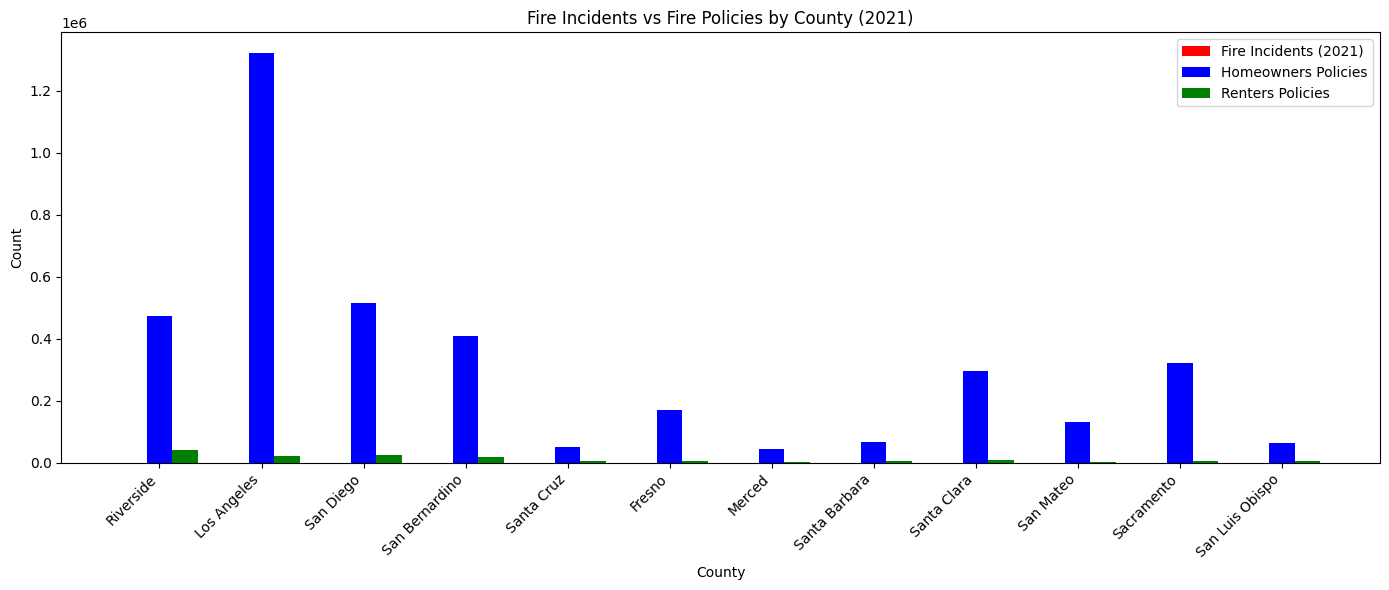

In [ ]:
summary_sorted_2021 = summary_2021.sort_values(by='Fire_Incidents_2021', ascending=False)

bar_width = 0.25
x = range(len(summary_sorted_2021))

plt.figure(figsize=(14, 6))

plt.bar(x, summary_sorted_2021['Fire_Incidents_2021'], width=bar_width, label='Fire Incidents (2021)', color='red')
plt.bar([i + bar_width for i in x], summary_sorted_2021['FireHomeOwner'], width=bar_width, label='Homeowners Policies', color='blue')
plt.bar([i + 2 * bar_width for i in x], summary_sorted_2021['FireRenters'], width=bar_width, label='Renters Policies', color='green')

plt.xlabel('County')
plt.ylabel('Count')
plt.title('Fire Incidents vs Fire Policies by County (2021)')
plt.xticks([i + bar_width for i in x], summary_sorted_2021['County'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


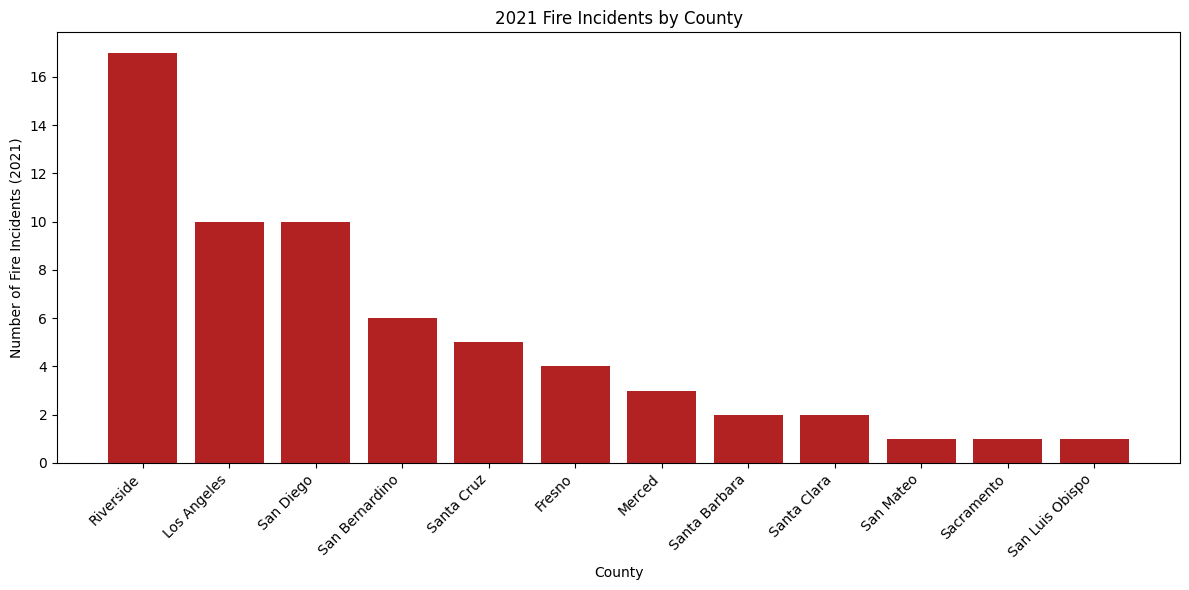

In [ ]:
incident_only_2021 = summary_2021[['County', 'Fire_Incidents_2021']].sort_values(by='Fire_Incidents_2021', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(incident_only_2021['County'], incident_only_2021['Fire_Incidents_2021'], color='firebrick')
plt.xlabel('County')
plt.ylabel('Number of Fire Incidents (2021)')
plt.title('2021 Fire Incidents by County')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#R^2 For Full coverage insurance With Los angeeles

file_path_1 = '/content/drive/MyDrive/STAT_596/California auto insurance.xlsx'
CountyInsuranceRates = pd.read_excel(file_path_1)

file_path_2 = '/content/drive/MyDrive/STAT_596/AutoTheft.xlsx'
AutoTheft = pd.read_excel(file_path_2)

CountyInsuranceRates['County'] = CountyInsuranceRates['County'].str.strip().str.lower()
AutoTheft['County'] = AutoTheft['County'].str.strip().str.lower()

merged_data = pd.merge(CountyInsuranceRates, AutoTheft, on='County')

X = merged_data[['2022']]
y = merged_data['FCAnnual']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.3f}")

R² Score: 0.725


In [ ]:
# R*^2 without LA
CountyInsuranceRates['County'] = CountyInsuranceRates['County'].str.strip().str.lower()
AutoTheft['County'] = AutoTheft['County'].str.strip().str.lower()

merged_data = pd.merge(CountyInsuranceRates, AutoTheft, on='County')

merged_data = merged_data[merged_data['County'] != 'los angeles']

X = merged_data[['2022']]
y = merged_data['FCAnnual']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.3f}")


R² Score: 0.666
